In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [ ]:
#The dataset is taken from the link https://www.kaggle.com/datasets/fanbyprinciple/iot-device-identification

In [26]:
# Load dataset
file_path = "iot_device_train.csv"
df = pd.read_csv(file_path)

In [27]:
# Display basic info
display(df.head())
display(df.info())


,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 298 entries, ack to device_category
dtypes: float64(80), int64(217), object(1)
memory usage: 2.3+ MB


None

In [28]:
# Encode target labels
label_encoder = LabelEncoder()
df['device_category'] = label_encoder.fit_transform(df['device_category'])


In [30]:
# Split dataset into features and labels
X = df.drop(columns=['device_category'])
y = df['device_category']

In [31]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Define the model
# Fully connected feedforward neural network, also known as a Multilayer Perceptron (MLP) is used here
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [38]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/20
25/25 [==============================] - 4s 17ms/step - loss: 1.7282 - accuracy: 0.5000 - val_loss: 1.2991 - val_accuracy: 0.6700
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 1.0102 - accuracy: 0.7575 - val_loss: 0.7823 - val_accuracy: 0.7800
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.7025 - accuracy: 0.7638 - val_loss: 0.6165 - val_accuracy: 0.7900
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5775 - accuracy: 0.7700 - val_loss: 0.5452 - val_accuracy: 0.7800
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.7788 - val_loss: 0.4961 - val_accuracy: 0.8050
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.7862 - val_loss: 0.4916 - val_accuracy: 0.7900
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.7900 - val_loss: 0.4745 - val_accuracy: 0.7950
Epoch 8/20
25/25 [=

In [40]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

7/7 [==============================] - 0s 1ms/step
                 precision    recall  f1-score   support

             TV       0.75      0.92      0.83        13
   baby_monitor       0.96      1.00      0.98        25
         lights       0.43      0.91      0.58        23
  motion_sensor       0.92      0.92      0.92        13
security_camera       1.00      1.00      1.00        20
 smoke_detector       1.00      0.96      0.98        27
         socket       0.33      0.05      0.08        21
     thermostat       1.00      0.76      0.86        21
          watch       0.91      0.95      0.93        22
   water_sensor       0.75      0.40      0.52        15

       accuracy                           0.80       200
      macro avg       0.81      0.79      0.77       200
   weighted avg       0.81      0.80      0.78       200



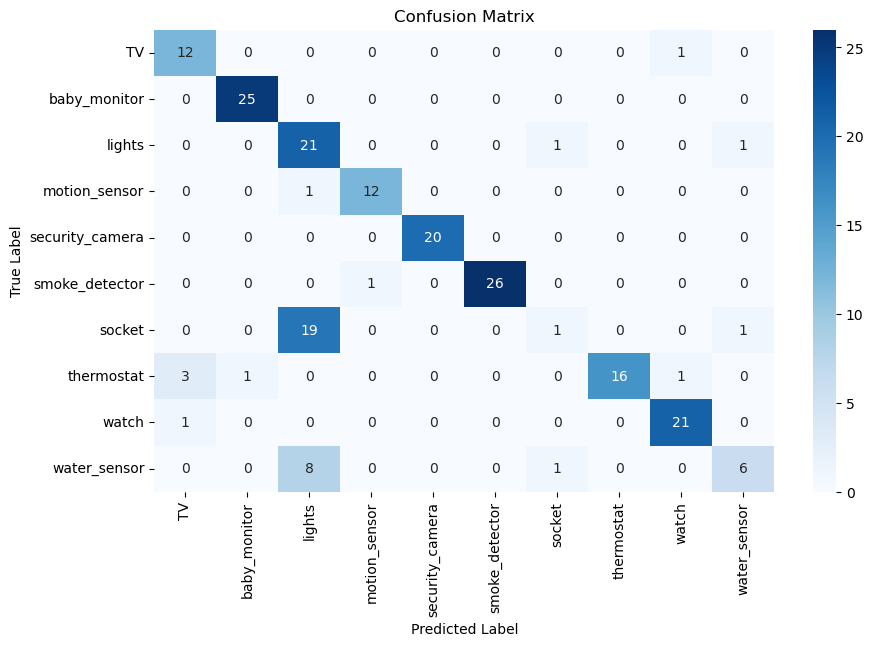

In [41]:
# Confusion Matrix
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

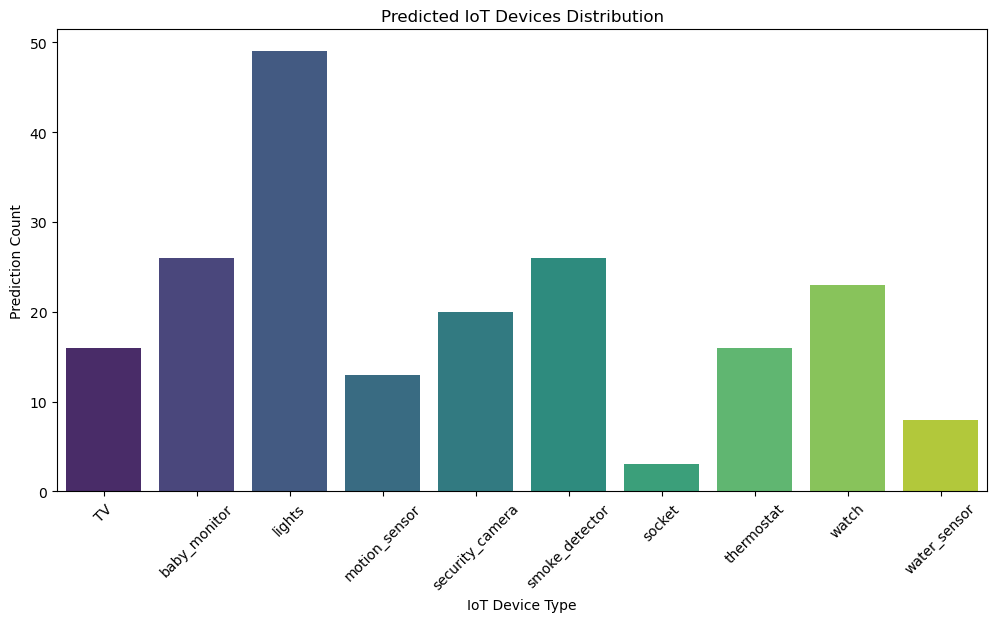

In [42]:
# Bar Graph of Predicted IoT Devices
unique, counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=label_encoder.inverse_transform(unique), y=counts, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("IoT Device Type")
plt.ylabel("Prediction Count")
plt.title("Predicted IoT Devices Distribution")
plt.show()


In [44]:
# Save the model
model.save("iot_device_classifier.keras")


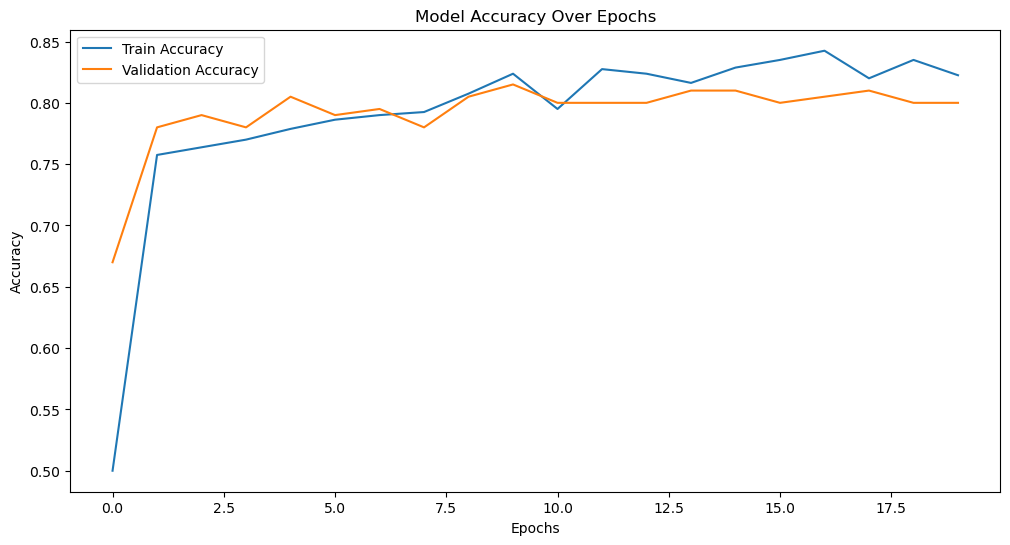

In [45]:
# Training history visualization
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

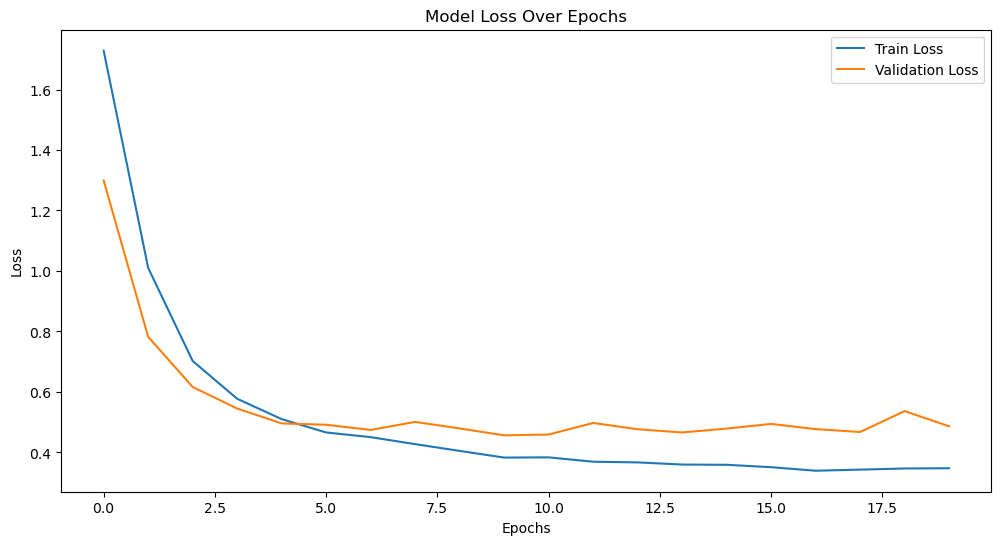

In [46]:
#Model Loss Over Epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

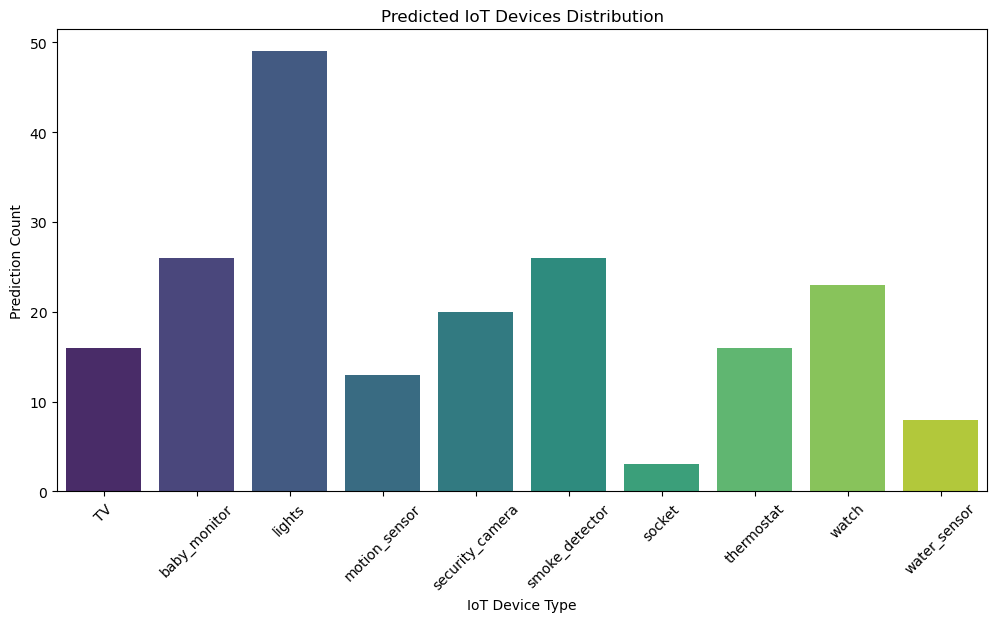

In [47]:
# Bar Graph of Predicted IoT Devices
unique, counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=label_encoder.inverse_transform(unique), y=counts, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("IoT Device Type")
plt.ylabel("Prediction Count")
plt.title("Predicted IoT Devices Distribution")
plt.show()
